In [405]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import acf
from numpy import array
from sklearn.preprocessing import StandardScaler
import seaborn as sns


### The 'parser' function scans through the 1st and 2nd columns and looks the text as dates in ISO8601 format







In [406]:
def parser(x):
	return datetime.strptime(x[:-1], '%Y-%m-%dT%H:%M:%S.%f')

In [407]:
#Since the monthly production quantity is to be predicted, it is best to set the 'end_date' column as the index

df_preci= pd.read_csv("/Users/ketanrode/Desktop/Projects/Production_Prediction/Daily Precipitation.csv", parse_dates=[0,1], date_parser=parser, index_col=1)
df_mois= pd.read_csv("/Users/ketanrode/Desktop/Projects/Production_Prediction/Daily Soil Mositure.csv", parse_dates=[0,1], date_parser=parser, index_col=1)
df_temp= pd.read_csv("/Users/ketanrode/Desktop/Projects/Production_Prediction/Daily Temperature.csv", parse_dates=[0,1], date_parser=parser, index_col=1)
df_ndvi= pd.read_csv("/Users/ketanrode/Desktop/Projects/Production_Prediction/Eight Day NDVI.csv", parse_dates=[0,1], date_parser=parser, index_col=1)
df_production=pd.read_csv("/Users/ketanrode/Desktop/Projects/Production_Prediction/Production Quantity.csv", parse_dates=[0,1], date_parser=parser, index_col=1)

In [408]:
df_preci.head()

,start_date,precip,region_id
end_date,,,
2014-01-01,2014-01-01,1.392393,93
2014-01-02,2014-01-02,0.315380,93
2014-01-03,2014-01-03,2.347846,93
2014-01-04,2014-01-04,21.466357,93
2014-01-05,2014-01-05,32.823651,93


In [409]:
df_mois.head()

,start_date,smos,region_id
end_date,,,
2014-01-01,2014-01-01,0.310787,93
2014-01-02,2014-01-02,0.192271,93
2014-01-03,2014-01-03,0.265683,93
2014-01-04,2014-01-04,0.265683,93
2014-01-05,2014-01-05,0.230782,93


In [410]:
df_temp.head()

,start_date,temp,region_id
end_date,,,
2014-01-02,2014-01-02,24.707605,93
2014-01-11,2014-01-11,26.421176,93
2014-01-15,2014-01-15,24.305642,93
2014-01-20,2014-01-20,25.142744,93
2014-01-23,2014-01-23,23.653173,93


In [411]:
df_ndvi.head()

,start_date,ndvi,region_id
end_date,,,
2014-01-03,2013-12-27,0.679106,93
2014-01-08,2014-01-01,0.701431,93
2014-01-16,2014-01-09,0.745149,93
2014-01-24,2014-01-17,0.747391,93
2014-02-01,2014-01-25,0.768325,93


In [412]:
df_preci.dtypes

start_date    datetime64[ns]
precip               float64
region_id              int64
dtype: object

In [413]:
df_production.head()

,start_date,prod,region_id
end_date,,,
2015-01-31,2015-01-01,171725,93
2015-02-28,2015-02-01,188325,93
2015-03-31,2015-03-01,247856,93
2015-04-30,2015-04-01,282791,93
2015-05-31,2015-05-01,291057,93


### Checking for null values



In [414]:
df_preci.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29940 entries, 2014-01-01 to 2022-03-13
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  29940 non-null  datetime64[ns]
 1   precip      29940 non-null  float64       
 2   region_id   29940 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 935.6 KB


In [415]:
df_mois.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29603 entries, 2014-01-01 to 2022-03-06
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  29603 non-null  datetime64[ns]
 1   smos        29603 non-null  float64       
 2   region_id   29603 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 925.1 KB


In [416]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12930 entries, 2014-01-02 to 2022-03-13
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  12930 non-null  datetime64[ns]
 1   temp        12930 non-null  float64       
 2   region_id   12930 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 404.1 KB


In [417]:
df_ndvi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3338 entries, 2014-01-03 to 2022-03-13
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  3338 non-null   datetime64[ns]
 1   ndvi        3338 non-null   float64       
 2   region_id   3338 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 104.3 KB


In [418]:
df_production.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2015-01-31 to 2020-12-31
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  720 non-null    datetime64[ns]
 1   prod        720 non-null    int64         
 2   region_id   720 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.5 KB


In [419]:
region =pd.unique(df_production.region_id)
print(region)

[ 93  94  95  97  98  99 102 103 104 105]


In [420]:
#region_id=93
df_preci_93= df_preci.loc[df_preci['region_id']==region[0],['precip']] 
df_mois_93= df_mois.loc[df_mois['region_id']==region[0],['smos']]
df_temp_93= df_temp.loc[df_temp['region_id']==region[0],['temp']]
df_ndvi_93= df_ndvi.loc[df_ndvi['region_id']==region[0],['start_date', 'ndvi']]
df_production_93= df_production.loc[df_production['region_id']==region[0],['start_date', 'prod']]

In [421]:
df_ndvi_93.head()

,start_date,ndvi
end_date,,
2014-01-03,2013-12-27,0.679106
2014-01-08,2014-01-01,0.701431
2014-01-16,2014-01-09,0.745149
2014-01-24,2014-01-17,0.747391
2014-02-01,2014-01-25,0.768325




*   Precipitation is at daily frequency. It is downsampled to monthly frequency 
so that every row represents the total precipation within past 1 month. 
*   Similarly, Soil Moisture is downsampled to monthly frequency so that every row represents the total soil moisture within past 1 month.
*   Temperature is also downsampled, so that mean temperature of past month is represented by every row.
*   NDVI is given at 8-Day frequency, it is also downsampled to monthly frequency. The rows are merged by taking mean.
*   By downsampling the dataset we will lose some information, but it is necessary beacause we need to forecast the production monthly.




















In [422]:
df_preci_93_resample= df_preci_93.resample('1M', label='right', closed='right').sum()
df_mois_93_resample= df_mois_93.resample('1M', label='right', closed='right').sum()
df_temp_93_resample= df_temp_93.resample('1M', label='right', closed='right').mean()
df_ndvi_93_resample= df_ndvi_93.resample('1M', label='right', closed='right').mean()

In [423]:
df_ndvi_93_resample.head(40)

,ndvi
end_date,
2014-01-31,0.718269
2014-02-28,0.767647
2014-03-31,0.743301
2014-04-30,0.807792
2014-05-31,0.813410
2014-06-30,0.803343
2014-07-31,0.783797
2014-08-31,0.792279
2014-09-30,0.793887


### All the data frames are joined by the index to create a single data frame representative of the data of region number 93



In [424]:
df1= df_production_93.join([df_preci_93_resample, df_mois_93_resample, df_temp_93_resample, df_ndvi_93_resample]).drop(['start_date'], axis=1)

In [425]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2015-01-31 to 2020-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prod    72 non-null     float64
 1   precip  72 non-null     float64
 2   smos    72 non-null     float64
 3   temp    72 non-null     float64
 4   ndvi    71 non-null     float64
dtypes: float64(5)
memory usage: 5.4 KB


In [426]:
df1.loc[df1['ndvi'].isna()==True] #Since there is no data for NDVI corresponding to November 2016, it being replaced by null

,prod,precip,smos,temp,ndvi
end_date,,,,,
2016-11-30,274107.0,267.675586,9.345249,27.394704,NaN


In [427]:
df1.loc['2016-11-30',['ndvi']]=df1.loc['2016-10-31',['ndvi']] # replaced the null value by filling the data of previous month

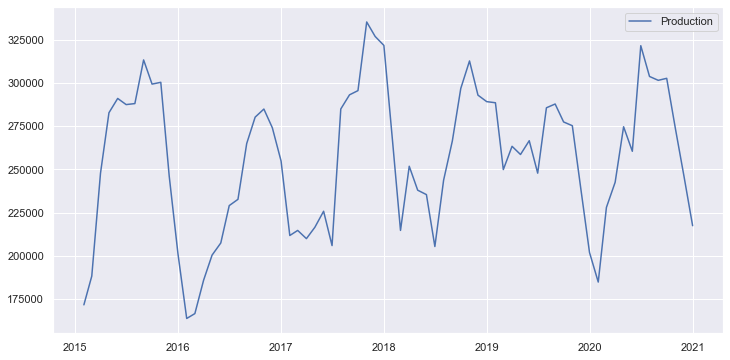

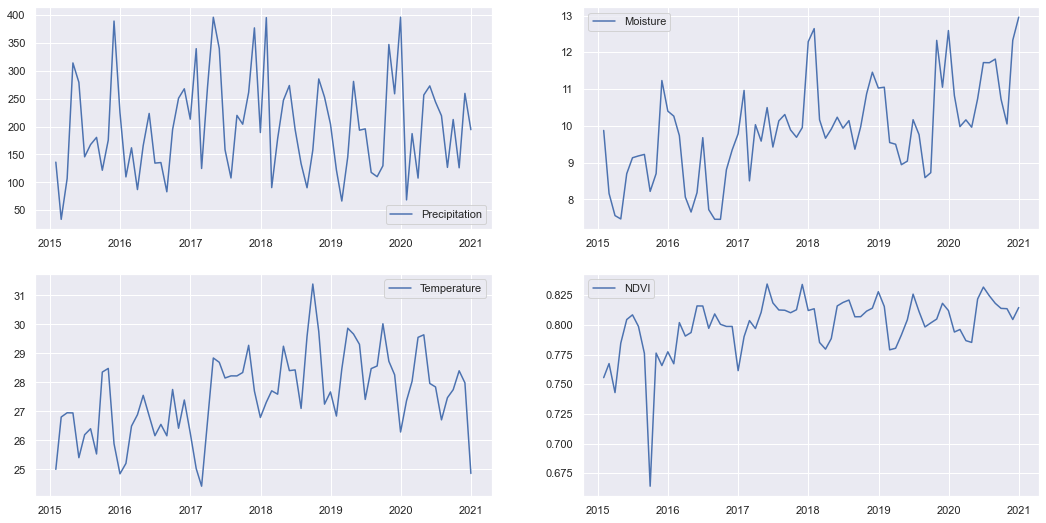

In [428]:
plt.figure(figsize=(12,6))
plt.plot(df1['prod'])
plt.legend(['Production'])
plt.show()

plt.figure(figsize=(18,9))
plt.subplot(2,2,1)
plt.plot(df1['precip'])
plt.legend(['Precipitation']) 

plt.subplot(2,2,2)
plt.plot(df1['smos'])
plt.legend(['Moisture'])

plt.subplot(2,2,3)
plt.plot(df1['temp'])
plt.legend(['Temperature'])

plt.subplot(2,2,4)
plt.plot(df1['ndvi'])
plt.legend(['NDVI'])

In [429]:
df1.head()

,prod,precip,smos,temp,ndvi
end_date,,,,,
2015-01-31,171725.0,136.228017,9.875098,25.003593,0.755540
2015-02-28,188325.0,33.771850,8.160648,26.807568,0.767399
2015-03-31,247856.0,107.094222,7.559063,26.954109,0.742958
2015-04-30,282791.0,313.994152,7.467456,26.948865,0.784608
2015-05-31,291057.0,279.247567,8.698660,25.405121,0.804500


### Because each column has a different range, there is a need to standarize the data



In [430]:
scaler = StandardScaler() 
scaler = scaler.fit(df1)
df_trans = scaler.transform(df1)
df=pd.DataFrame(df_trans, columns=["prod", "precip", "smos", "temp", "ndvi"], index=df1.index)
df.head()

,prod,precip,smos,temp,ndvi
end_date,,,,,
2015-01-31,-2.017261,-0.736320,-0.020502,-1.802209,-1.774766
2015-02-28,-1.619050,-1.909795,-1.322959,-0.527618,-1.295142
2015-03-31,-0.190982,-1.070002,-1.779978,-0.424080,-2.283626
2015-04-30,0.647061,1.299713,-1.849572,-0.427785,-0.599140
2015-05-31,0.845351,0.901745,-0.914234,-1.518511,0.205336


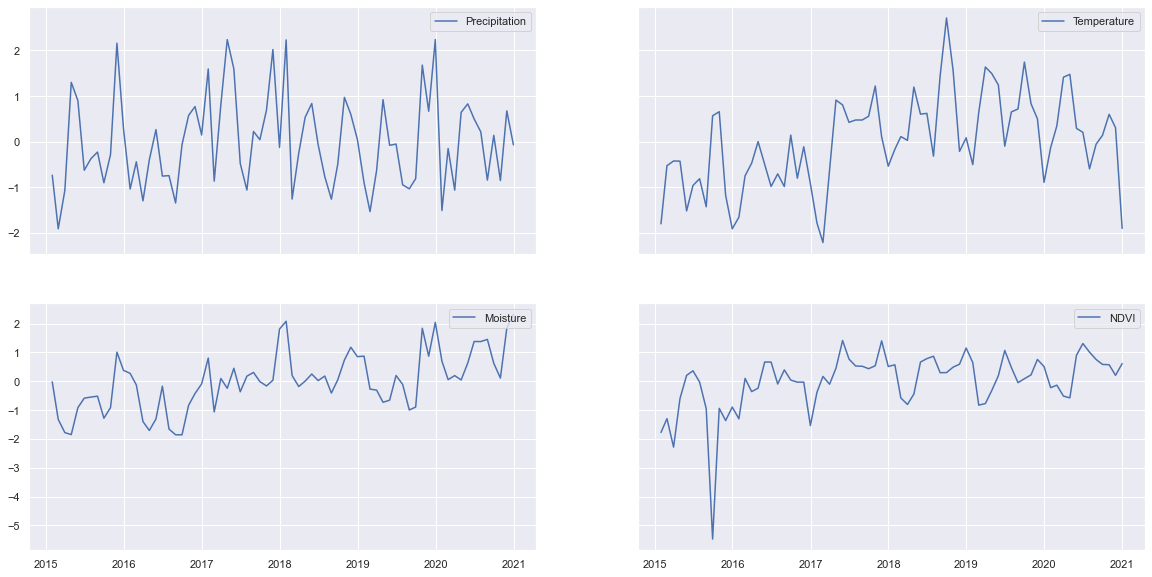

In [431]:
fig, axs= plt.subplots(2, 2, sharex='col', sharey='row')
fig.set_size_inches(20,10)
axs[0,0].plot(df['precip'])
axs[0,0].legend(['Precipitation'], loc="upper right")

axs[1,0].plot(df['smos'])
axs[1,0].legend(['Moisture'], loc="upper right")

axs[0,1].plot(df['temp'])
axs[0,1].legend(['Temperature'], loc="upper right")

axs[1,1].plot(df['ndvi'])
axs[1,1].legend(['NDVI'], loc="upper right")



```
*   df -- after scaling 
*   df1-- before scaling
```



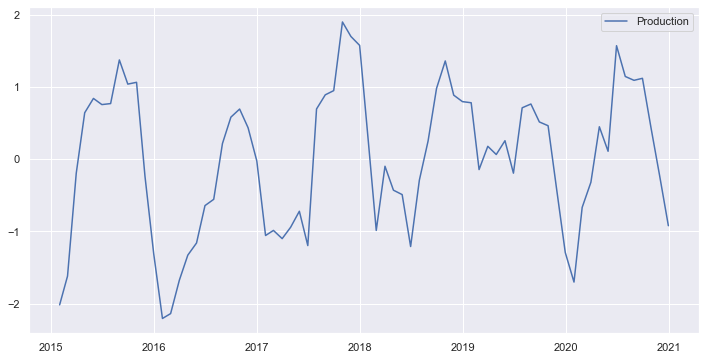

In [432]:
plt.figure(figsize=(12,6))
plt.plot(df['prod'])

plt.legend(['Production'])
plt.show()

### The causality between differrent time series is checked by Granger causality test



In [433]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False, maxlag=5):    
    
    #Check Granger Causality of all possible combinations of the Time series.
    #The rows are the response variable, columns are predictors. 
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df  

###  As can be seen from the table, the row prod_y contains values which are less than 0.05, it means the production is affected by all factors (precipitation, soil moisture, temperature, NDVI)




In [434]:
grangers_causation_matrix(df, variables = ['prod', 'precip','smos', 'temp', 'ndvi'])                                                

,prod_x,precip_x,smos_x,temp_x,ndvi_x
prod_y,1.0000,0.0000,0.0000,0.0149,0.0246
precip_y,0.0110,1.0000,0.1455,0.0014,0.0734
smos_y,0.0012,0.0652,1.0000,0.0003,0.1046
temp_y,0.0042,0.0006,0.0011,1.0000,0.0031
ndvi_y,0.1127,0.1340,0.0552,0.0002,1.0000


In [435]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

The time series for 'prod', 'precip' and 'smos' are highly correlated and hence when integrated together, they will not deviate from equilibrium in the long term

In [436]:
# cointegration_test(df[['prod', 'diff_precip', 'smos', 'diff_temp', 'ndvi']])
cointegration_test(df[['prod', 'precip', 'smos', 'temp', 'ndvi']])

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
prod   ::  88.46     > 60.0627   =>   True
precip ::  51.63     > 40.1749   =>   True
smos   ::  27.34     > 24.2761   =>   True
temp   ::  10.93     > 12.3212   =>   False
ndvi   ::  2.85      > 4.1296    =>   False




```
Firstly, the data is split into train and test sets. Test set contains last 10 rows of the data
```



In [437]:
nobs = 10
df_train = df[0:-nobs]




###Run the Augmented Dickey–Fuller test to check for stationarity




In [438]:
def stationary_test(df,columns,treshold = 0.05):

    for quant in columns:
        
        # Remove null values (useful when plotting diff series)
        time_series = df[quant][df[quant].notnull()]

        # Autocorrelation function
        plot_acf(time_series,title='Autocorrelation function - {}'.format(quant))
        plt.xlabel('lags')
        plt.show()

        # Dickely-Fuller test statistics
        dickley_fuller_test = adfuller(time_series)
        pvalue = dickley_fuller_test[1]

        if pvalue < treshold:
            print('Time series "{}" is stationay (Null Hypothesis rejected - p-value = {:.4f})'.format(quant,pvalue))
        else:
            print('Time series "{}" might have unit root (Null Hypothesis cannot be rejected - p-value = {:.4f})'.format(quant,pvalue))

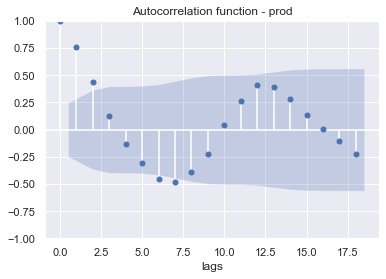

Time series "prod" is stationay (Null Hypothesis rejected - p-value = 0.0007)


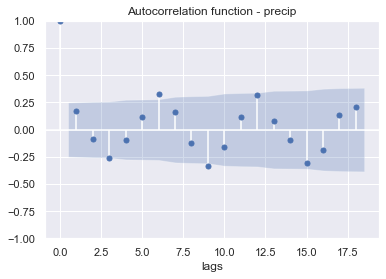

Time series "precip" might have unit root (Null Hypothesis cannot be rejected - p-value = 0.2073)


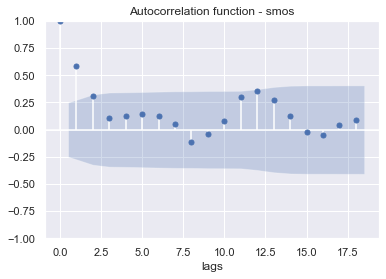

Time series "smos" is stationay (Null Hypothesis rejected - p-value = 0.0018)


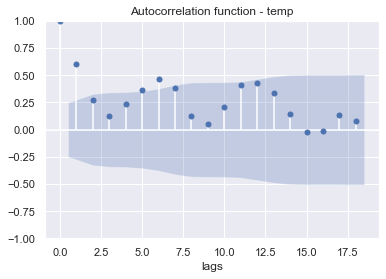

Time series "temp" might have unit root (Null Hypothesis cannot be rejected - p-value = 0.1924)


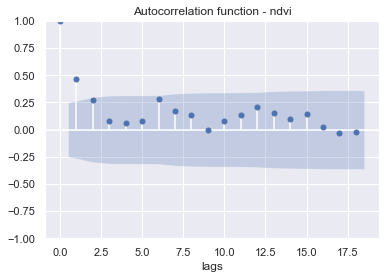

Time series "ndvi" is stationay (Null Hypothesis rejected - p-value = 0.0001)


In [439]:
stationary_test(df_train, df_train.columns)


### As can be seen from the above graphs, the p-value for precipitation and temperature is greater than 0.05 hence they are non-stationary and there is need to difference the data




In [440]:
df_diff1= df_train.diff().dropna()

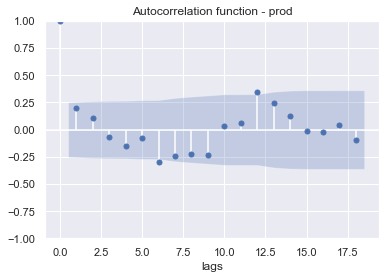

Time series "prod" is stationay (Null Hypothesis rejected - p-value = 0.0000)


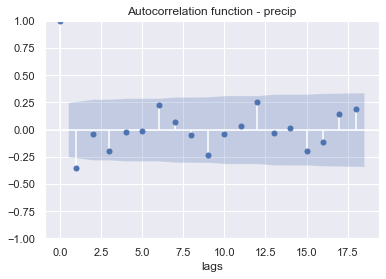

Time series "precip" is stationay (Null Hypothesis rejected - p-value = 0.0000)


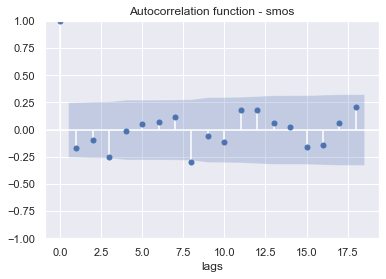

Time series "smos" is stationay (Null Hypothesis rejected - p-value = 0.0001)


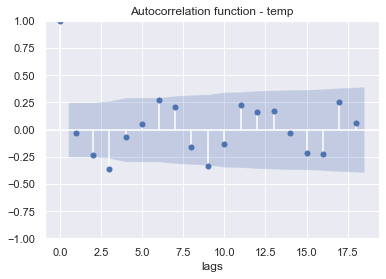

Time series "temp" is stationay (Null Hypothesis rejected - p-value = 0.0002)


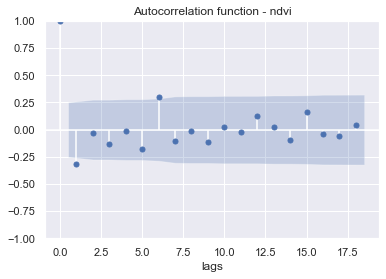

Time series "ndvi" is stationay (Null Hypothesis rejected - p-value = 0.0000)


In [441]:
stationary_test(df_diff1, df_diff1.columns)

### The order corresponding to the minimum Akaike Information Criterion (AIC) is selected as the order for the best model



/Users/ketanrode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


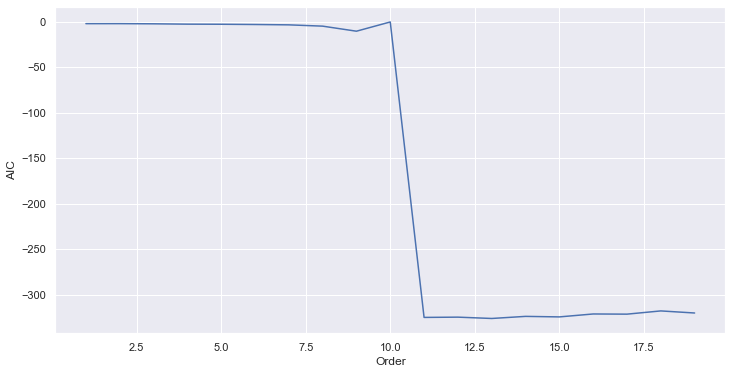

In [442]:
model = VAR(df_diff1)
results_aic=[]
for i in range(1,20,1):
    if i==10:
      results_aic.append(0)
      continue
    result = model.fit(i)
    results_aic.append(result.aic)
    # print('Lag Order =', i)
    # print('AIC : ', result.aic)
    # print('BIC : ', result.bic)
    # print('FPE : ', result.fpe)
    # print('HQIC: ', result.hqic, '\n')

sns.set()
plt.figure(figsize=(12,6))
plt.plot(list(np.arange(1,20,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [443]:
results_aic

[-1.8620017270027494,
 -1.839946257583652,
 -2.0302472169628905,
 -2.4076772984274895,
 -2.5190314924685175,
 -2.78090565424053,
 -3.1780667695956453,
 -4.5977090872465025,
 -10.162760352606035,
 0,
 -325.2231361270795,
 -324.9228807340662,
 -326.38745907623706,
 -324.0789736645525,
 -324.6586726314897,
 -321.43405744254187,
 -321.6262085348457,
 -318.0699995391515,
 -320.36051231460965]

In [444]:
fitted = model.fit(17)

### Any leftover patterns in the residuals is checked by serial correlation using Durbin Watson Statistic. It can range from 0 to 4, the more closer it is to 2, the lesser the chances are of having any unexplained pattern left in the data



In [445]:
out = durbin_watson(fitted.resid)
def adjust(val, length= 6): 
  return str(val).ljust(length)
for col, val in zip(df.columns, out):
  print(adjust(col), ':', round(val, 2))

prod   : 1.53
precip : 2.0
smos   : 1.76
temp   : 1.74
ndvi   : 1.58


### We need lag_order past timestamps to predict the values for the current timestamp


In [446]:
# Get the lag order
lag_order = fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df_diff1.values[-lag_order:]
forecast_input

17


array([[ 0.38103548,  1.4616545 ,  0.68351764, -1.15676783,  0.1895354 ],
       [-0.47449521, -0.37345521,  0.44545756, -1.77034462,  0.10157029],
       [-0.08976547, -0.55252943, -0.32710496,  0.29823213,  0.56122288],
       [-0.01559261, -0.94365054,  0.01725753, -0.58821653, -0.50351647],
       [-0.92682491, -0.6361283 , -1.14333399,  1.14503913, -1.47789532],
       [ 0.32269512,  0.90625226, -0.03501444,  0.99565377,  0.05374233],
       [-0.11368214,  1.54866836, -0.42257865, -0.14258666,  0.45181899],
       [ 0.19135734, -1.00083903,  0.07317632, -0.25163986,  0.51742037],
       [-0.45014674,  0.02737192,  0.85626947, -1.34116383,  0.8750133 ],
       [ 0.90665047, -0.89409253, -0.30842261,  0.75123634, -0.59340971],
       [ 0.0525591 , -0.08773013, -0.88856852,  0.06355301, -0.52488273],
       [-0.24883411,  0.22378566,  0.10230703,  1.02915366,  0.13660155],
       [-0.05224725,  2.48942385,  2.7338512 , -0.91366723,  0.13279394],
       [-0.87040364, -1.01201205, -0.9

### Last 17 (lag_order) rows would be given to the model to forecast for next 10 (nobs) months 



In [447]:
fc = fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast
fc.shape

(10, 5)

### Because we differenced the data one time before fitting the model, we need to revert the differencing


In [448]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [449]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False) 
type(df_results)

pandas.core.frame.DataFrame

In [450]:
df_results=df_results.loc[:, ['prod_forecast', 'precip_forecast', 'smos_forecast', 'temp_forecast', 'ndvi_forecast']]

In [451]:
array(df_results).shape

(10, 5)

### Reverting the Standarization



In [452]:
dff=scaler.inverse_transform(array(df_results))

dff=pd.DataFrame(dff, index=df_results.index[-nobs:], columns=df_results.columns)
dff.head()

,prod_forecast,precip_forecast,smos_forecast,temp_forecast,ndvi_forecast
end_date,,,,,
2020-03-31,234142.378292,104.483261,8.148270,31.054489,0.784805
2020-04-30,271580.847384,331.265219,9.772131,30.247953,0.796055
2020-05-31,255770.256856,171.720831,9.193937,30.305112,0.796985
2020-06-30,310946.131163,269.333868,10.381644,27.740153,0.826380
2020-07-31,313928.600230,75.305150,9.481267,28.124290,0.806204


In [453]:
dff.head()

,prod_forecast,precip_forecast,smos_forecast,temp_forecast,ndvi_forecast
end_date,,,,,
2020-03-31,234142.378292,104.483261,8.148270,31.054489,0.784805
2020-04-30,271580.847384,331.265219,9.772131,30.247953,0.796055
2020-05-31,255770.256856,171.720831,9.193937,30.305112,0.796985
2020-06-30,310946.131163,269.333868,10.381644,27.740153,0.826380
2020-07-31,313928.600230,75.305150,9.481267,28.124290,0.806204


In [454]:
df_test= df1[-nobs:]
df_test.head()

,prod,precip,smos,temp,ndvi
end_date,,,,,
2020-03-31,242595.0,107.686947,10.163018,29.555205,0.786727
2020-04-30,274686.0,256.587087,9.963535,29.642767,0.785231
2020-05-31,260507.0,272.855971,10.735984,27.966113,0.821783
2020-06-30,321550.0,243.986552,11.720747,27.843494,0.831854
2020-07-31,303763.0,219.323534,11.717144,26.709598,0.824497


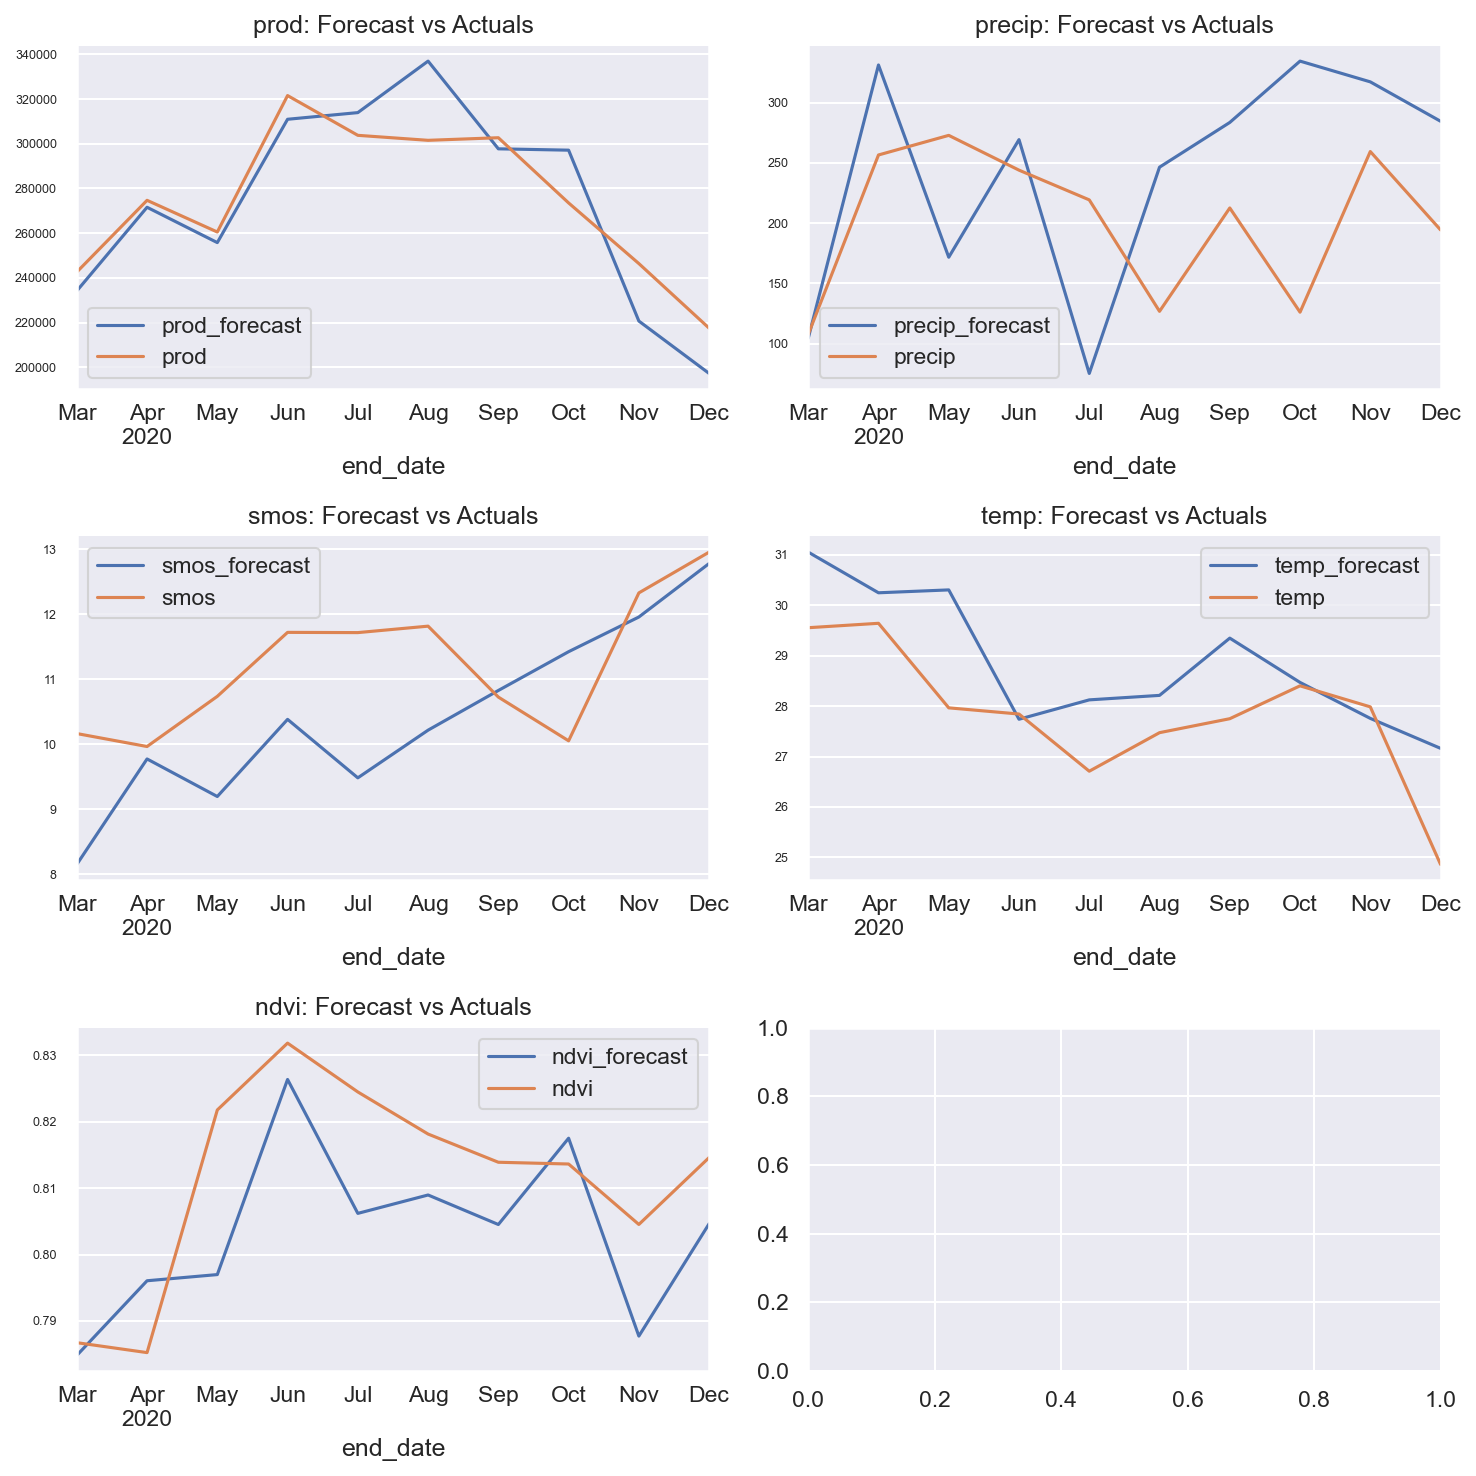

In [455]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=150, figsize=(10,10))

for i, (col,ax) in enumerate(zip(df1.columns, axes.flatten())):
    dff[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [456]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of Production')
accuracy_prod = forecast_accuracy(dff['prod_forecast'].values, df_test['prod'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of Precipitation')
accuracy_prod = forecast_accuracy(dff['precip_forecast'].values, df_test['precip'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of Moisture')
accuracy_prod = forecast_accuracy(dff['smos_forecast'].values, df_test['smos'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of Temperature')
accuracy_prod = forecast_accuracy(dff['temp_forecast'].values, df_test['temp'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of NDVI')
accuracy_prod = forecast_accuracy(dff['ndvi_forecast'].values, df_test['ndvi'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of Production
mape   :  0.0548
me     :  -862.0642
mae    :  14703.2429
mpe    :  -0.0074
rmse   :  17966.7746
corr   :  0.9329
minmax :  0.0528

Forecast Accuracy of Precipitation
mape   :  0.5067
me     :  39.8576
mae    :  89.5291
mpe    :  0.2953
rmse   :  105.5579
corr   :  0.1597
minmax :  0.3234

Forecast Accuracy of Moisture
mape   :  0.0991
me     :  -0.7997
mae    :  1.0944
mpe    :  -0.0699
rmse   :  1.3375
corr   :  0.5941
minmax :  0.0975

Forecast Accuracy of Temperature
mape   :  0.0399
me     :  1.0233
mae    :  1.0897
mpe    :  0.0375
rmse   :  1.3621
corr   :  0.7509
minmax :  0.0375

Forecast Accuracy of NDVI
mape   :  0.0136
me     :  -0.0081
mae    :  0.0111
mpe    :  -0.0099
rmse   :  0.0129
corr   :  0.7281
minmax :  0.0136


In [457]:
df_results['prod_forecast'].values

array([-5.19953257e-01,  3.78144522e-01, -1.12996679e-03,  1.32246396e+00,
        1.39400932e+00,  1.94665428e+00,  1.00527130e+00,  9.90887757e-01,
       -8.43110016e-01, -1.40525795e+00])

### Using the complete dataset to forecast for 2021


In [458]:
df_test['prod'].values

array([242595., 274686., 260507., 321550., 303763., 301528., 302692.,
       273522., 246388., 217480.])

In [459]:
prediction =pd.read_csv("/Users/ketanrode/Desktop/Projects/Production_Prediction/predicted_production_qty.csv")
prediction.head()

,start_date,end_date,prod,region_id
0,2021-01-01T00:00:00.000Z,2021-01-31T00:00:00.000Z,NaN,93
1,2021-02-01T00:00:00.000Z,2021-02-28T00:00:00.000Z,NaN,93
2,2021-03-01T00:00:00.000Z,2021-03-31T00:00:00.000Z,NaN,93
3,2021-04-01T00:00:00.000Z,2021-04-30T00:00:00.000Z,NaN,93
4,2021-05-01T00:00:00.000Z,2021-05-31T00:00:00.000Z,NaN,93


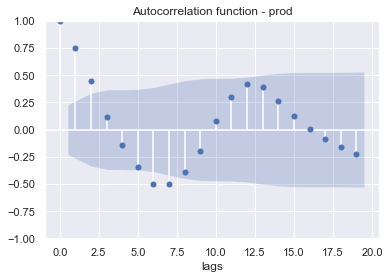

Time series "prod" is stationay (Null Hypothesis rejected - p-value = 0.0001)


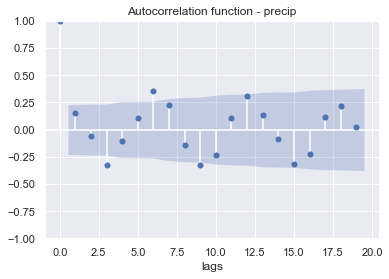

Time series "precip" might have unit root (Null Hypothesis cannot be rejected - p-value = 0.0937)


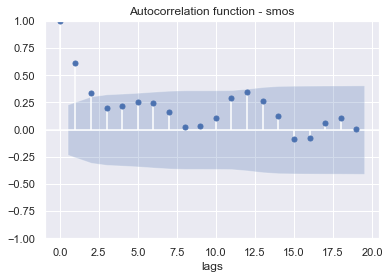

Time series "smos" is stationay (Null Hypothesis rejected - p-value = 0.0078)


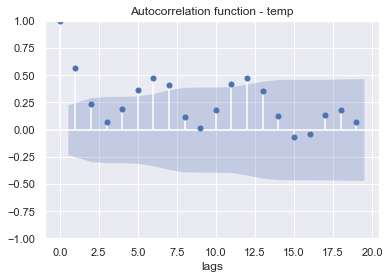

Time series "temp" might have unit root (Null Hypothesis cannot be rejected - p-value = 0.6085)


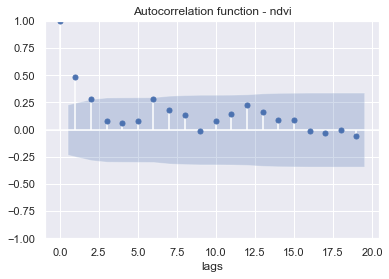

Time series "ndvi" is stationay (Null Hypothesis rejected - p-value = 0.0011)


In [460]:
stationary_test(df, df.columns)
full_train = df.diff().dropna()

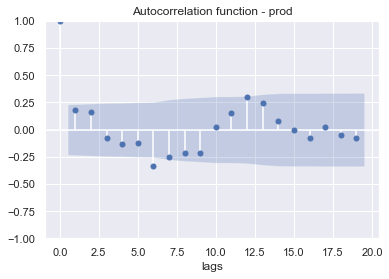

Time series "prod" is stationay (Null Hypothesis rejected - p-value = 0.0000)


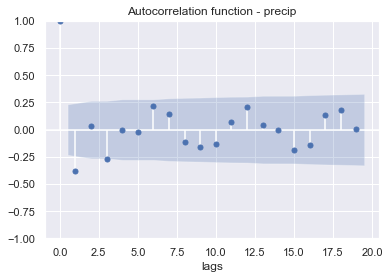

Time series "precip" is stationay (Null Hypothesis rejected - p-value = 0.0000)


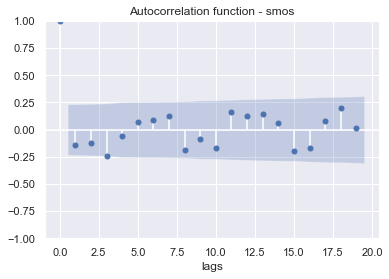

Time series "smos" is stationay (Null Hypothesis rejected - p-value = 0.0000)


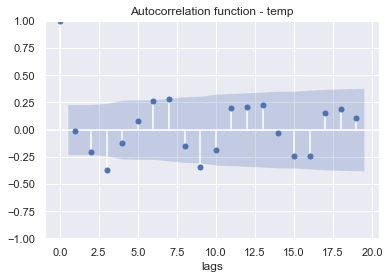

Time series "temp" is stationay (Null Hypothesis rejected - p-value = 0.0006)


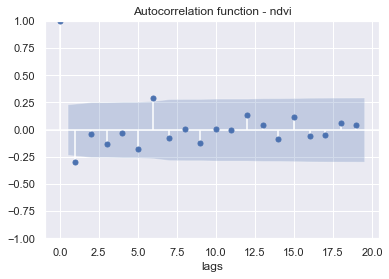

Time series "ndvi" is stationay (Null Hypothesis rejected - p-value = 0.0000)


In [461]:
stationary_test(full_train, df.columns)

/Users/ketanrode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


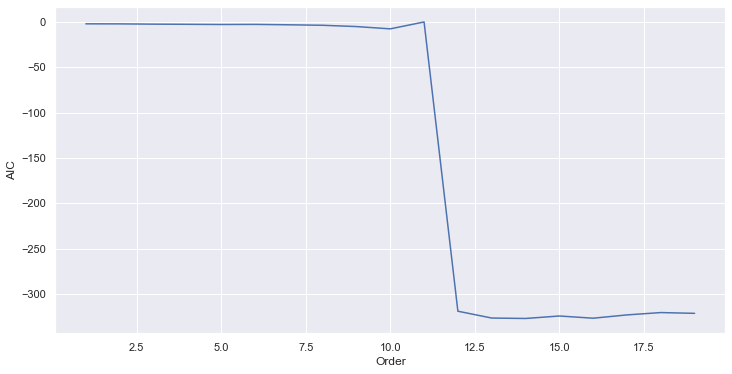

[-2.0493567437588522,
 -2.1085968653084226,
 -2.4055606698113965,
 -2.573393129738565,
 -2.784143124251454,
 -2.6698067766851405,
 -3.1097594535464737,
 -3.6524851951505486,
 -5.073503424842808,
 -7.600086077295085,
 0,
 -318.8843516255287,
 -326.4127237072644,
 -326.88866998602253,
 -324.15362735953613,
 -326.59615179866614,
 -322.9538152149802,
 -320.37422135966347,
 -321.2372131341952]

In [462]:
model = VAR(full_train)
results_aic=[]
for i in range(1,20,1):
    if i==11:
      results_aic.append(0)
      continue
    result = model.fit(i)
    results_aic.append(result.aic)
    #print('Lag Order =', i)
    # print('AIC : ', result.aic)
    # print('BIC : ', result.bic)
    # print('FPE : ', result.fpe)
    # print('HQIC: ', result.hqic, '\n')

sns.set()
plt.figure(figsize=(12,6))
plt.plot(list(np.arange(1,20,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

results_aic

In [463]:
fitted = model.fit(14)

In [464]:
out = durbin_watson(fitted.resid)
def adjust(val, length= 6): 
  return str(val).ljust(length)
for col, val in zip(df.columns, out):
  print(adjust(col), ':', round(val, 2))

prod   : 2.17
precip : 2.43
smos   : 2.34
temp   : 1.84
ndvi   : 2.02


In [465]:
# Get the lag order
lag_order = fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df.values[-lag_order:]
forecast_input

14


array([[-0.40332959,  0.6665436 ,  0.8727586 ,  0.50124046,  0.75894152],
       [-1.29126892,  2.23905579,  2.04374824, -0.8933653 ,  0.51165909],
       [-1.70145059, -1.51069674,  0.69931653, -0.13057017, -0.22000328],
       [-0.66619705, -0.15072839,  0.05882984,  0.34583838, -0.13373759],
       [-0.3171864 , -1.06321297,  0.1982288 ,  1.4137128 , -0.51345901],
       [ 0.4526329 ,  0.642205  ,  0.04668277,  1.47557935, -0.57397093],
       [ 0.11249804,  0.82853959,  0.63350711,  0.29094651,  0.90433649],
       [ 1.5768363 ,  0.4978856 ,  1.38162471,  0.20431071,  1.31163995],
       [ 1.15015044,  0.21540935,  1.37888806, -0.59683865,  1.01410754],
       [ 1.09653584, -0.84395196,  1.4543351 , -0.05687238,  0.75763495],
       [ 1.12445861,  0.13857432,  0.62483265,  0.13884448,  0.58577946],
       [ 0.42471012, -0.85205284,  0.11352064,  0.5993767 ,  0.57510051],
       [-0.2261975 ,  0.6749013 ,  1.84318758,  0.3047177 ,  0.2067908 ],
       [-0.91966097, -0.07004128,  2.3

In [466]:
nobs=12
fc = fitted.forecast(y=forecast_input, steps=nobs)

df_forecast = pd.DataFrame(fc, columns=df.columns + '_1d')
df_forecast

,prod_1d,precip_1d,smos_1d,temp_1d,ndvi_1d
0,-1.926996,-2.531747,-2.019971,-1.143256,-0.682906
1,-0.515111,-2.411912,-2.710993,1.785788,-1.067853
2,0.255799,-0.562781,-2.407939,2.245973,-0.579276
3,1.173043,-0.300941,-0.254726,1.231549,0.492261
4,0.994488,0.821914,0.166941,0.472473,0.298001
5,1.578469,0.068434,-0.986725,0.008228,0.613931
6,1.204512,0.440048,1.991004,-0.754845,0.289932
7,0.369247,-1.225009,1.013307,-0.197482,0.001395
8,-0.472593,1.541269,1.861608,-0.688254,-0.781972
9,-1.790494,-0.970496,-1.886553,0.867153,-1.092285


In [467]:
df_results = invert_transformation(full_train, df_forecast, second_diff=False) 
type(df_results)

pandas.core.frame.DataFrame

In [468]:
df_results=df_results.loc[:, ['prod_forecast', 'precip_forecast', 'smos_forecast', 'temp_forecast', 'ndvi_forecast']]        

In [469]:
dff=scaler.inverse_transform(array(df_results))

dff=pd.DataFrame(dff, index=df_results.index[-nobs:], columns=df_results.columns)
dff.head()

,prod_forecast,precip_forecast,smos_forecast,temp_forecast,ndvi_forecast
0,146579.815819,-85.571831,7.871094,22.811383,0.792618
1,125106.699930,-296.156011,4.302558,25.338874,0.766214
2,135770.030519,-345.292468,1.132938,28.517682,0.751891
3,184669.965553,-371.567654,0.797636,30.260738,0.764062
4,226126.579582,-299.806266,1.017385,30.929447,0.771431


In [470]:
prediction['prod']=dff['prod_forecast']
prediction.head(15)

,start_date,end_date,prod,region_id
0,2021-01-01T00:00:00.000Z,2021-01-31T00:00:00.000Z,146579.815819,93
1,2021-02-01T00:00:00.000Z,2021-02-28T00:00:00.000Z,125106.699930,93
2,2021-03-01T00:00:00.000Z,2021-03-31T00:00:00.000Z,135770.030519,93
3,2021-04-01T00:00:00.000Z,2021-04-30T00:00:00.000Z,184669.965553,93
4,2021-05-01T00:00:00.000Z,2021-05-31T00:00:00.000Z,226126.579582,93
5,2021-06-01T00:00:00.000Z,2021-06-30T00:00:00.000Z,291927.279763,93
6,2021-07-01T00:00:00.000Z,2021-07-31T00:00:00.000Z,342139.040674,93
7,2021-08-01T00:00:00.000Z,2021-08-31T00:00:00.000Z,357531.639751,93
8,2021-09-01T00:00:00.000Z,2021-09-30T00:00:00.000Z,337830.933328,93
9,2021-10-01T00:00:00.000Z,2021-10-31T00:00:00.000Z,263191.661117,93


In [471]:
prediction.to_csv("/Users/ketanrode/Desktop/Projects/Production_Prediction/predicted.csv")